In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
all_time_fitnesses, average_fitness, average_adjusted_fitness = [], [], []
diversity, invalid_count = [], []

In [3]:
with open("populationHistory.txt", "r") as f:
    data = f.readlines()

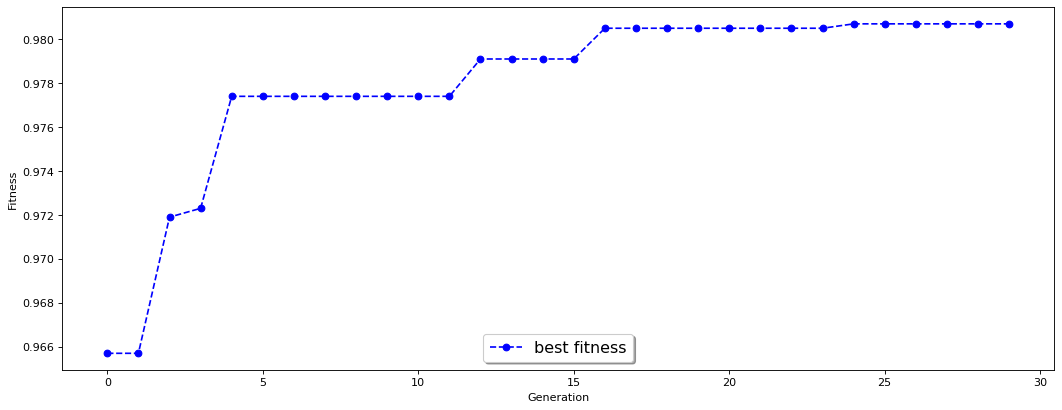

In [4]:
best_fitnesses = list(map(float, data[data.index("TRACKER INFO\n") + 2].strip().split()))
fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
ax.plot(best_fitnesses, 'bo--', label="best fitness")
plt.ylabel('Fitness')
plt.xlabel('Generation')
legend = ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.show()

In [5]:
for i in range(int(data[data.index("TRACKER INFO\n") + 1])):
    generation_index = data.index("\tGeneration " + str(i) + "\n")
    fitnesses, adjusted_fitness_sum, zero, diff = [], 0, 0, 0
    for j in range(1, 26):
        individual_info = data[generation_index + j].strip().split()
        fitness = float(individual_info[1])
        if fitness == 0:
            zero += 1
        fitnesses.append(fitness)
        adjusted_fitness = float(individual_info[2])
        diff += fitness - adjusted_fitness
        adjusted_fitness_sum += adjusted_fitness
    all_time_fitnesses.append(fitnesses)
    average_adjusted_fitness.append(adjusted_fitness_sum / 25)
    average_fitness.append(sum(fitnesses) / 25)
    invalid_count.append(zero)
    diversity.append(diff / 25)

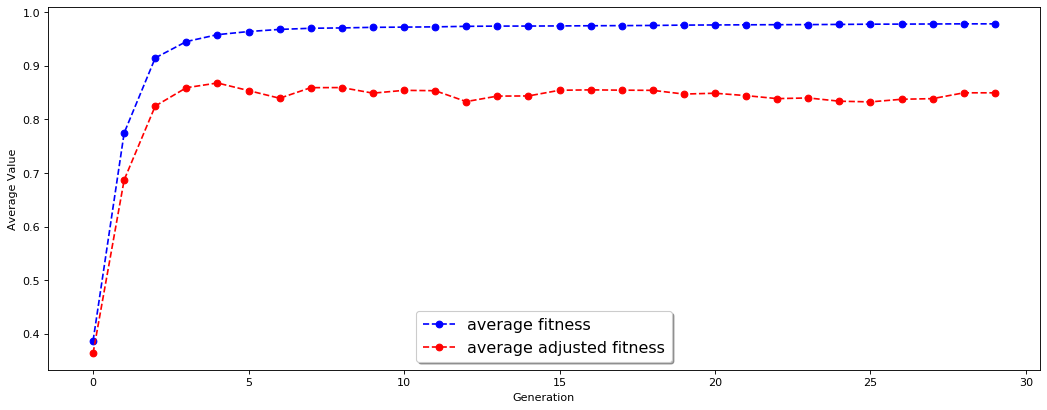

In [6]:
fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
ax.plot(average_fitness, 'bo--', label="average fitness")
ax.plot(average_adjusted_fitness, 'ro--', label="average adjusted fitness")
plt.ylabel('Average Value')
plt.xlabel('Generation')
legend = ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.show()

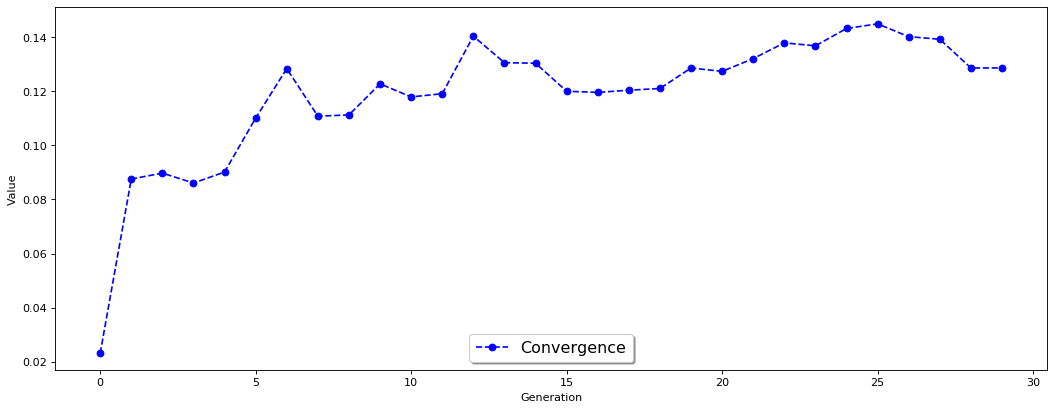

0.11505319242257757


In [7]:
fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
ax.plot(diversity, 'bo--', label="Similarity")
plt.ylabel('Value')
plt.xlabel('Generation')
legend = ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.show()
print(sum(diversity) / 31)

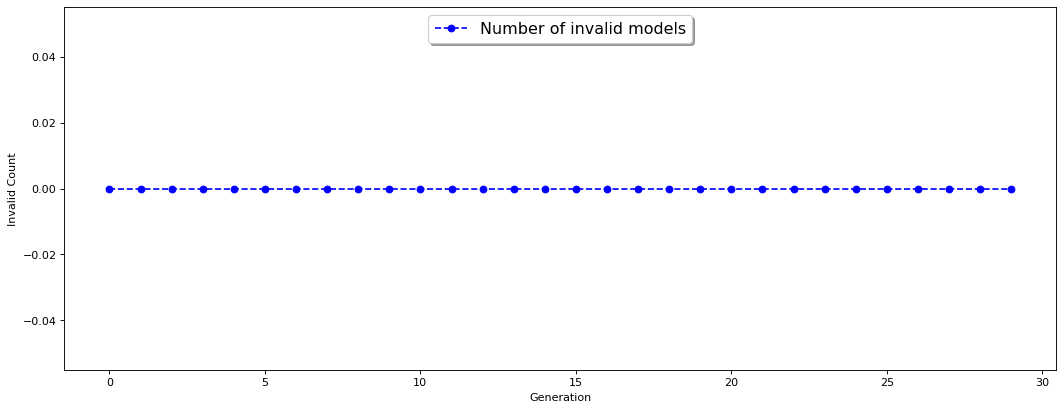

In [8]:
fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
ax.plot(invalid_count, 'bo--', label="Number of invalid models")
plt.ylabel('Invalid Count')
plt.xlabel('Generation')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()

In [9]:
import numpy as np
np.array(all_time_fitnesses).shape

(30, 25)

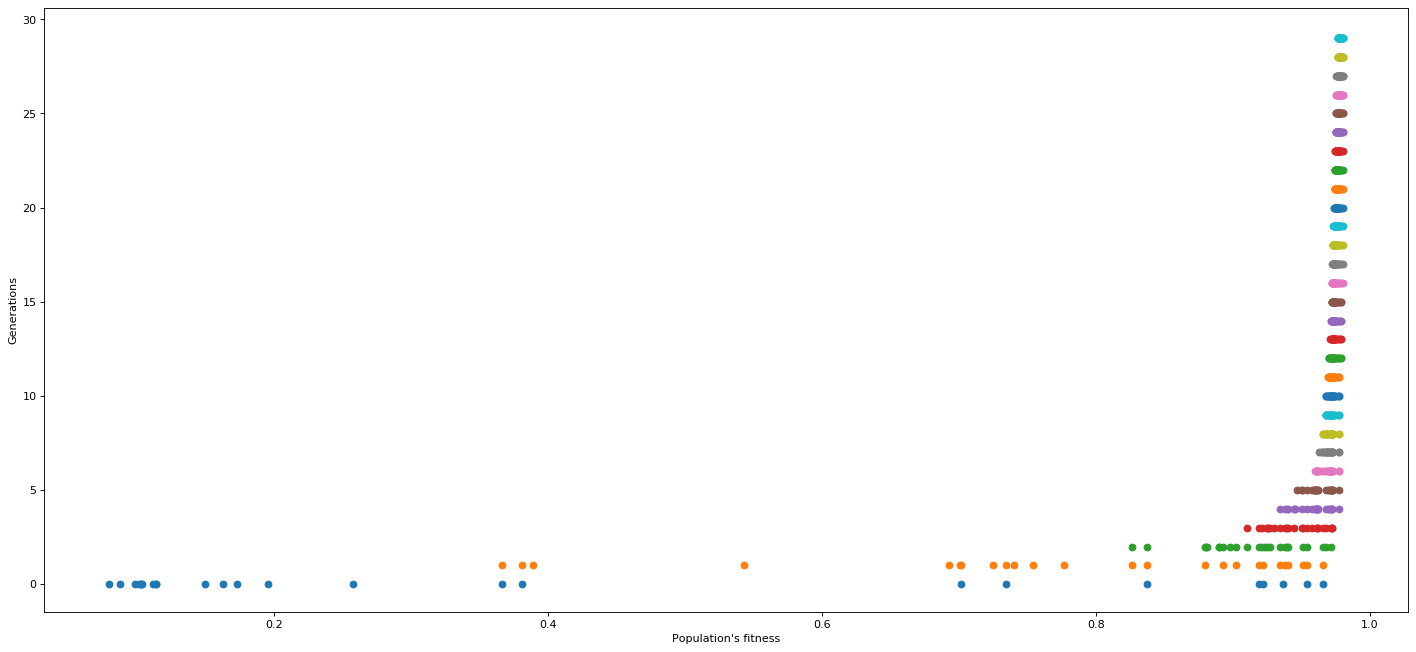

In [10]:
fig, ax = plt.subplots(figsize=(22, 10), dpi=80)
for index, fitnesses in enumerate(all_time_fitnesses):
    ax.scatter(np.array(fitnesses), np.array([index] * 25))
plt.xlabel("Population's fitness")
plt.ylabel("Generations")
plt.show()

In [11]:
current_population = []
for i in range(1, 26):
    individual = data[i].strip().split()
    current_population.append([individual[0], float(individual[1]), float(individual[2])])
current_population.sort(key=lambda x: x[1], reverse=True)
for item in current_population[:13]:
    print(item)

['110010010101001011000101001110110001001100100111100010110110111100101', 0.9807000160217285, 0.8729716051708568]
['111101000100001000000001110101000110101110100111110010110111001100100', 0.9804999828338623, 0.9058967232704163]
['100111010000101011000101001100011100110101100111100011111101101100101', 0.9804999828338623, 0.8225305411550734]
['100111010000101011000101000100011100110101100111001011111100011100101', 0.9793999791145325, 0.8107255382670298]
['111101000100001000000001001001000110101110100111110010110111001100101', 0.9793999791145325, 0.9084289661352185]
['110110010000101011000101000000011100110101000111001111111100011100101', 0.9790999889373779, 0.8186363796393077]
['110110010000101011100101001000010100110100101111001101111100001100101', 0.9790999889373779, 0.846513532102108]
['110110010000101011000101000100100001101101010111001111111111010010111', 0.9789000153541565, 0.8293458463417159]
['110010010001001011100101001100110000110101101111100010110100110100101', 0.9783999919891

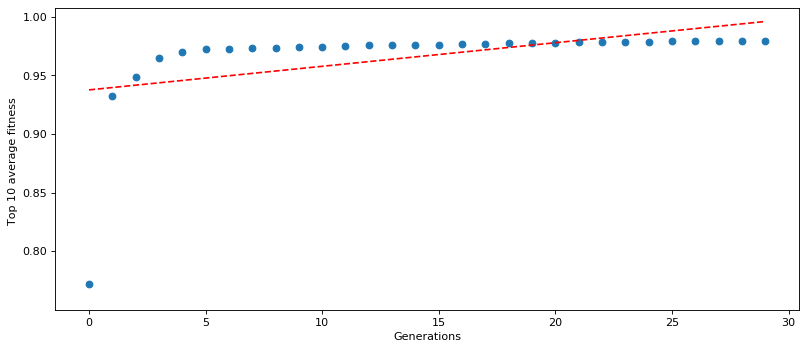

In [13]:
avg_top_10 = []
for i in range(int(data[data.index("TRACKER INFO\n") + 1])):
    generation_index = data.index("\tGeneration " + str(i) + "\n")
    fitnesses = []
    for j in range(1, 26):
        individual = data[generation_index + j].strip().split()
        fitness = float(individual[1])
        fitnesses.append(fitness)
    fitnesses.sort(reverse=True)
    avg_top_10.append(sum(fitnesses[:10])/10)
fig, ax = plt.subplots(figsize=(12, 5), dpi=80)
ax.scatter(np.array([i for i in range(30)]), avg_top_10)
plt.xlabel("Generations")
plt.ylabel("Top 10 average fitness ")
z = np.polyfit([i for i in range(30)], avg_top_10, 1)
p = np.poly1d(z)
plt.plot([i for i in range(30)],p([i for i in range(30)]),"r--")
plt.show()

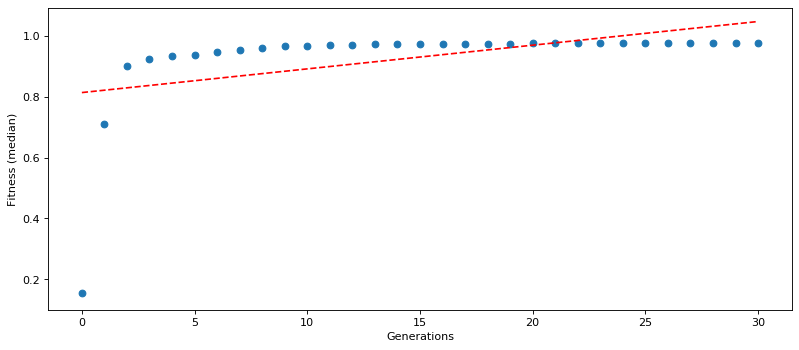

In [ ]:
median = []
for i in range(int(data[data.index("TRACKER INFO\n") + 1])):
    generation_index = data.index("\tGeneration " + str(i) + "\n")
    fitnesses = []
    for j in range(1, 26):
        individual = data[generation_index + j].strip().split()
        fitness = float(individual[1])
        fitnesses.append(fitness)
    fitnesses.sort(reverse=True)
    median.append((fitnesses[25 // 2]))
fig, ax = plt.subplots(figsize=(12, 5), dpi=80)
ax.scatter(np.array([i for i in range(31)]), median)
plt.xlabel("Generations")
plt.ylabel("Fitness (median)")
z = np.polyfit([i for i in range(31)], median, 1)
p = np.poly1d(z)
plt.plot([i for i in range(31)],p([i for i in range(31)]),"r--")
plt.show()